# **Sentiment Analysis with Classical and Deep Learning Text Vectorization Onur**

**Step 1: Bag of Words + Machine Learning Classifier:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_excel("Reviews.xlsx")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


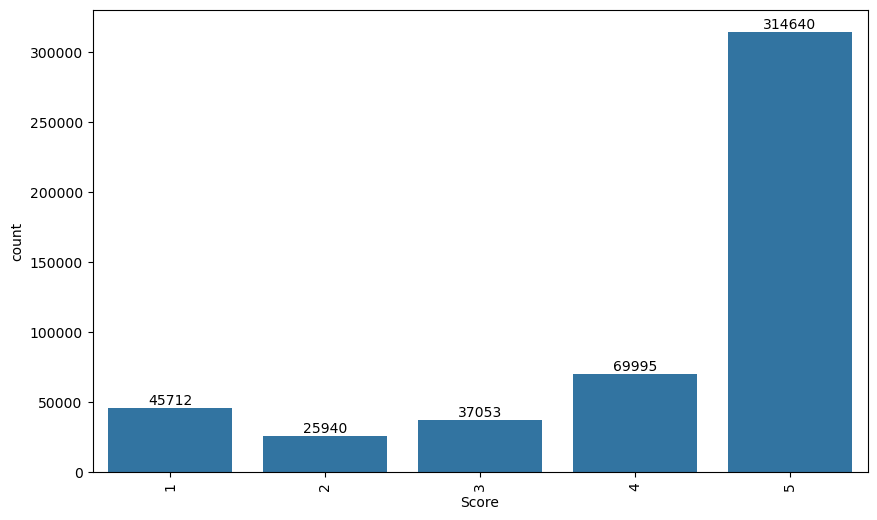

In [3]:
ax = sns.countplot(data =df, x ="Score")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

In [4]:
df["Score"].value_counts()

Score
5    314640
4     69995
1     45712
3     37053
2     25940
Name: count, dtype: int64

In [5]:
df2 = df.copy()

In [6]:
df2["Text"].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [7]:
import re
s = "http\\:www.mynet.com #Score @Text"
s = re.sub("http\S+", "", s).strip()          # Remove non-space characters following 'http'
s

'#Score @Text'

In [8]:
s = re.sub("#\S+", "", s)  # Remove hashtags and any following non-whitespace characters
s

' @Text'

In [9]:
s = re.sub("@\S+", "", s)
s.strip()

''

In [10]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:       # In sentiment analysis, we do not remove words like "not" and "no" because they play a crucial role in negation and can completely reverse the meaning of a sentence.
        stop_words.remove(i)

In [11]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [12]:
# Define columns to clean
cols = ["Text", "ProfileName"]

# Fill missing values and apply cleaning function
cleaning_text = df2[cols].fillna("").astype(str).applymap(cleaning)

# Overwrite the original columns with cleaned text
df2[cols] = cleaning_text

# Preview updated DataFrame
display(df2.head())


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanut pe...
2,3,B000LQOCH0,ABXLMWJIXXAIN,natalia corres natalia corres,1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,michael bigham wassir,0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...


In [13]:
df2["Text"],["ProfileName"]

(0         bought several vitality canned dog food produc...
 1         product arrived labeled jumbo salted peanut pe...
 2         confection around century light pillowy citrus...
 3         looking secret ingredient robitussin believe f...
 4         great taffy great price wide assortment yummy ...
                                 ...                        
 493335    im big fan dark roasted coffee difficult time ...
 493336    look forward coffee morning ground fragrant ei...
 493337    great tasting coffee reasonable price used vac...
 493338    tried dozen italian roast expensive cheap defi...
 493339    love eight oclock dark roast coffee subscribe ...
 Name: Text, Length: 493340, dtype: object,
 ['ProfileName'])

In [14]:
# Fill missing values in both columns with empty strings
df2[["Text", "ProfileName"]] = df2[["Text", "ProfileName"]].fillna("")

# Apply the cleaning function to each column separately
df2["Text"] = df2["Text"].apply(cleaning)
df2["ProfileName"] = df2["ProfileName"].apply(cleaning)

# Preview
display(df2.head())


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanut pe...
2,3,B000LQOCH0,ABXLMWJIXXAIN,natalia corres natalia corres,1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,michael bigham wassir,0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...


In [15]:
df2[["Text", "ProfileName"]] = df2[["Text", "ProfileName"]].fillna("").applymap(cleaning)


**2. Feature Engineering and Modeling:**

**Step 1: Bag of Words + Machine Learning Classifier:**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df2["Text"]
y= df2["Score"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_features=10000)

X_train_count = vectorizer.fit_transform(X_train)

X_test_count = vectorizer.transform(X_test)

print("Shape of training matrix:", X_train_count.shape)
print("Shape of test matrix:", X_test_count.shape)

sample_dense = X_train_count[:10].toarray()  # Only first 10 rows
print(sample_dense)

Shape of training matrix: (394672, 10000)
Shape of test matrix: (98668, 10000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names_out())

,aa,aafco,ab,aback,abandoned,abc,abdominal,ability,able,abroad,absence,absent,absinthe,absolute,absolutely,absolutley,absolutly,absorb,absorbed,absorbing,absorbs,absorption,absurd,abundance,abundant,abuse,abused,acacia,academy,acai,acana,accent,accept,acceptable,accepted,accepting,access,accessible,accessory,accident,accidentally,accidently,accommodate,accompanied,accompanies,accompaniment,accompany,accompanying,accomplish,accomplished,according,accordingly,account,accurate,accurately,accustomed,acerola,acesulfame,acetate,ache,achieve,achieved,acid,acidic,acidity,acidophilus,acknowledge,acne,acquire,acquired,acre,acrid,across,act,acted,acting,action,active,actively,activity,actor,actual,actuality,actually,acv,ad,adagio,adam,adapt,adapter,add,added,addendum,addict,addicted,addicting,addiction,addictive,adding,addition,additional,additionally,additive,address,addressed,adequate,adequately,adhere,adhesive,adjust,adjusted,adjusting,adjustment,administer,administration,admit,admitted,admittedly,adobo,adopted,adopting,adorable,adore,adored,adores,adult,adulterated,advance,advanced,advantage,adventure,adventurous,adverse,adversely,advertise,advertised,advertisement,advertises,advertising,advertized,advice,advise,advised,advocate,aerator,aero,aerobie,aerogarden,aerogrow,aeropress,aesthetic,affair,affect,affected,affecting,affiliated,afford,affordable,afghanistan,aficionado,aforementioned,afraid,africa,african,afterall,afterlife,afternoon,aftertaste,afterward,afterwards,agave,age,aged,agency,agent,aggressive,agility,aging,ago,agree,agreeable,agreed,agreement,agrees,ah,ahead,ahmad,ahoy,aid,ailment,aim,aimed,aint,air,airbrush,airline,airplane,airport,airtight,airy,aisle,aka,akin,akita,al,ala,alabama,alarm,alarmed,alarming,alaska,alaskan,alba,albacore,albanese,albeit,albertsons,alcohol,alcoholic,ale,alec,alergies,alert,alertness,alfalfa,alfredo,algae,ali,alike,alimentum,alittle,alive,alkali,alkaline,allergen,allergic,allergy,alleviate,alley,alliance,allot,allotment,allow,allowance,allowed,allowing,allows,allspice,almond,almost,...,wheaten,wheatgrass,wheel,whenever,whereas,wheres,wherever,whether,whew,whey,whichever,whiff,whilst,whim,whine,whining,whip,whipped,whipping,whirl,whirley,whirly,whisk,whiskas,whisked,whisker,whiskey,whisky,white,whitefish,whoa,whoever,whole,wholefoods,wholeheartedly,wholesale,wholesome,wholly,whopping,whose,whove,wicked,wide,widely,wider,width,wierd,wife,wiggle,wikipedia,wild,wilderness,wildly,williams,willing,willingly,willpower,wilton,wimp,wimpy,win,wind,window,wine,winery,wing,winner,winning,winona,winter,wintergreen,wipe,wiped,wiping,wire,wired,wisconsin,wisdom,wise,wish,wished,wishing,wiskas,wit,withdrawal,within,without,withstand,wok,woke,wolf,wolfed,wolfgang,woman,womens,wonder,wondered,wonderful,wonderfully,wondering,wonka,wont,wood,wooden,woodsy,woody,woof,worcestershire,word,wording,wore,work,worked,worker,working,workout,workplace,world,worldwide,worm,worn,worried,worry,worrying,worse,worst,wort,worth,worthington,worthless,worthwhile,worthy,would,wouldnt,wouldve,wound,wow,wrap,wrapped,wrapper,wrapping,wrigleys,wrinkle,write,writer,writes,writing,written,wrong,wrote,wt,wtf,ww,wysong,xanthan,xmas,xtra,xylitol,ya,yahoo,yakisoba,yall,yam,yamamotoyama,yard,yay,yea,yeah,year,yearly,yearning,yeast,yellow,yellowfin,yellowish,yep,yerba,yes,yesterday,yet,yield,yielded,yikes,yirgacheffe,ymmv,yo,yoga,yoghurt,yogi,yogurt,yolk,york,yorkie,yorkies,yorkshire,youd,youll,young,younger,youngest,youre,youth,youtube,youve,yr,yuban,yucateco,yucca,yuck,yucky,yuk,yum,yumm,yummier,yummiest,yumminess,yummm,yummy,yunnan,yup,zap,zatarains,zealand,zen,zero,zest,zesty,zevia,zhenas,zico,zicos,zinc,zing,zinger,zip,zipfizz,ziploc,ziplock,zipper,zippy,ziti,ziwipeak,zoe,zola,zombie,zone,zoo,zp,zucchini,zukes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [23]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [24]:
y_train

458612    4
151664    5
316147    4
272504    1
337888    5
         ..
331927    5
360705    2
285886    5
346493    5
138348    5
Name: Score, Length: 394672, dtype: int64

In [25]:
y_train.unique()

array([4, 5, 1, 2, 3], dtype=int64)

**Naive Bayes**

In [26]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [27]:
nb = MultinomialNB(alpha=3)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=3)

In [28]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 5628  1382   614   278  1240]
 [ 1305  1555   880   455   993]
 [  982   814  2274  1448  1893]
 [  804   481  1287  4610  6817]
 [ 2126   702  1201  5685 53214]]
Test_Set
              precision    recall  f1-score   support

           1       0.52      0.62      0.56      9142
           2       0.32      0.30      0.31      5188
           3       0.36      0.31      0.33      7411
           4       0.37      0.33      0.35     13999
           5       0.83      0.85      0.84     62928

    accuracy                           0.68     98668
   macro avg       0.48      0.48      0.48     98668
weighted avg       0.67      0.68      0.68     98668

Train_Set
              precision    recall  f1-score   support

           1       0.53      0.63      0.58     36570
           2       0.36      0.34      0.35     20752
           3       0.40      0.34      0.36     29642
           4       0.40      0.36      0.38     55996
           5       0.83      0.85      0.84   

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.681449
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

In [30]:
!pip install yellowbrick

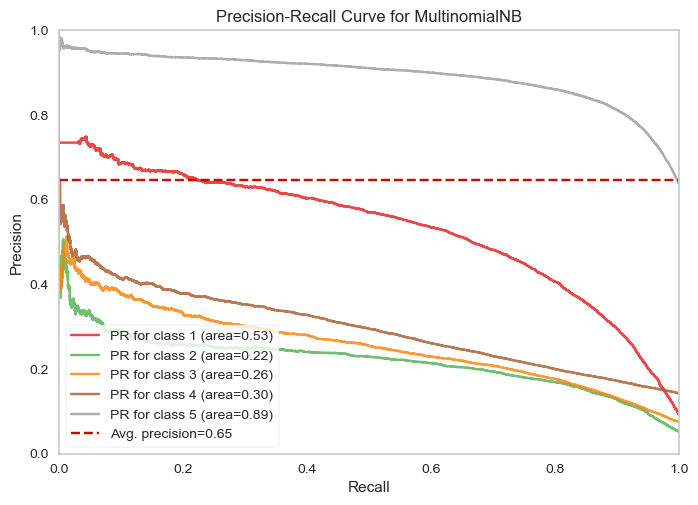

In [31]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [33]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 5904   418   325   158  2337]
 [ 1461   952   663   263  1849]
 [  721   416  2011   928  3335]
 [  303   178   696  3034  9788]
 [  590   152   370  1391 60425]]
Test_Set
              precision    recall  f1-score   support

           1       0.66      0.65      0.65      9142
           2       0.45      0.18      0.26      5188
           3       0.49      0.27      0.35      7411
           4       0.53      0.22      0.31     13999
           5       0.78      0.96      0.86     62928

    accuracy                           0.73     98668
   macro avg       0.58      0.46      0.49     98668
weighted avg       0.69      0.73      0.69     98668

Train_Set
              precision    recall  f1-score   support

           1       0.68      0.67      0.68     36570
           2       0.55      0.22      0.31     20752
           3       0.53      0.29      0.38     29642
           4       0.58      0.24      0.34     55996
           5       0.78      0.97      0.86  

**SVM**

In [34]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [35]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 5833   239   224   190  2656]
 [ 1454   794   530   292  2118]
 [  730   280  1705   988  3708]
 [  310   119   457  2733 10380]
 [  505    83   299  1061 60980]]
Test_Set
              precision    recall  f1-score   support

           1       0.66      0.64      0.65      9142
           2       0.52      0.15      0.24      5188
           3       0.53      0.23      0.32      7411
           4       0.52      0.20      0.28     13999
           5       0.76      0.97      0.85     62928

    accuracy                           0.73     98668
   macro avg       0.60      0.44      0.47     98668
weighted avg       0.69      0.73      0.68     98668

Train_Set
              precision    recall  f1-score   support

           1       0.70      0.67      0.68     36570
           2       0.67      0.20      0.30     20752
           3       0.61      0.27      0.37     29642
           4       0.59      0.22      0.33     55996
           5       0.77      0.97      0.86  

In [36]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.729532
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

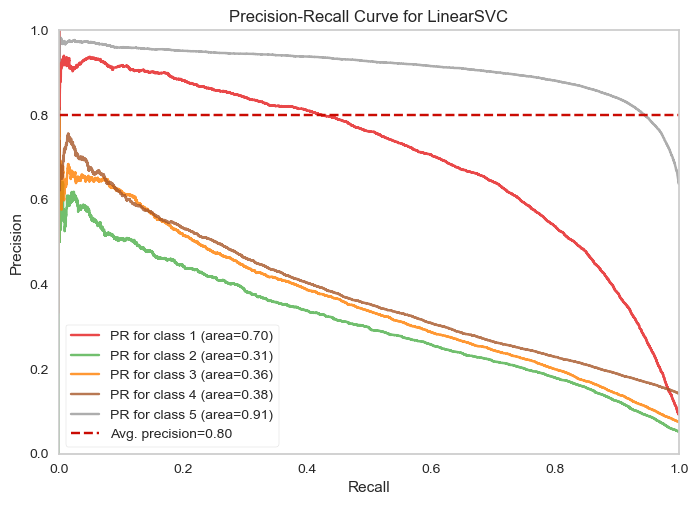

In [37]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

**KNN**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[ 3421   297   277   315  4832]
 [  598  1203   261   274  2852]
 [  564   283  1912   532  4120]
 [  564   234   462  3675  9064]
 [ 1316   506   774  2080 58252]]
Test_Set
              precision    recall  f1-score   support

           1       0.53      0.37      0.44      9142
           2       0.48      0.23      0.31      5188
           3       0.52      0.26      0.34      7411
           4       0.53      0.26      0.35     13999
           5       0.74      0.93      0.82     62928

    accuracy                           0.69     98668
   macro avg       0.56      0.41      0.45     98668
weighted avg       0.66      0.69      0.66     98668

Train_Set
              precision    recall  f1-score   support

           1       0.64      0.48      0.55     36570
           2       0.65      0.35      0.45     20752
           3       0.66      0.36      0.47     29642
           4       0.70      0.37      0.48     55996
           5       0.77      0.95      0.85  

In [40]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.689203
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

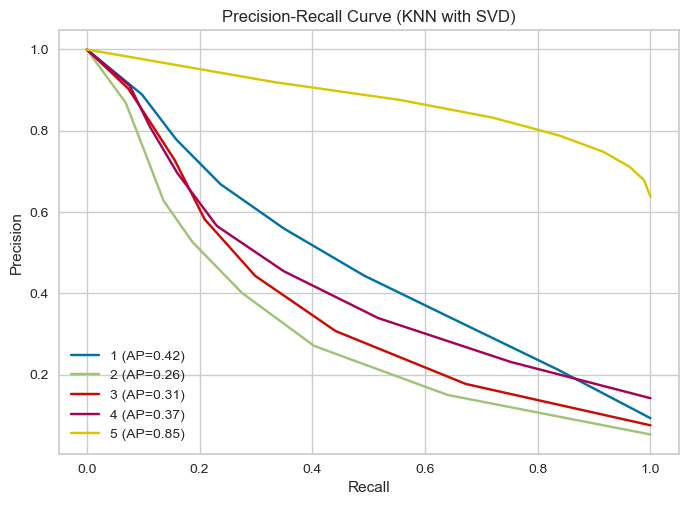

In [43]:
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=200, random_state=42)
X_train_reduced = svd.fit_transform(X_train_count)
X_test_reduced = svd.transform(X_test_count)

# Train KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model.fit(X_train_reduced, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test_reduced)
classes = model.classes_

# Plot Precision-Recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

for i, cls in enumerate(classes):
    y_true_bin = (y_test == cls).astype(int)
    precision, recall, _ = precision_recall_curve(y_true_bin, y_proba[:, i])
    ap = average_precision_score(y_true_bin, y_proba[:, i])
    plt.plot(recall, precision, label=f"{cls} (AP={ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (KNN with SVD)")
plt.legend()
plt.show()


**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [50]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 6934   400   298   274  1236]
 [ 1258  2055   488   379  1008]
 [  913   390  3219  1106  1783]
 [  759   236   680  6350  5974]
 [ 2525   539   872  3956 55036]]
Test_Set
              precision    recall  f1-score   support

           1       0.56      0.76      0.64      9142
           2       0.57      0.40      0.47      5188
           3       0.58      0.43      0.50      7411
           4       0.53      0.45      0.49     13999
           5       0.85      0.87      0.86     62928

    accuracy                           0.75     98668
   macro avg       0.62      0.58      0.59     98668
weighted avg       0.74      0.75      0.74     98668

Train_Set
              precision    recall  f1-score   support

           1       0.71      0.88      0.79     36570
           2       0.81      0.80      0.80     20752
           3       0.83      0.75      0.79     29642
           4       0.74      0.67      0.70     55996
           5       0.91      0.91      0.91   

In [46]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.684439
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

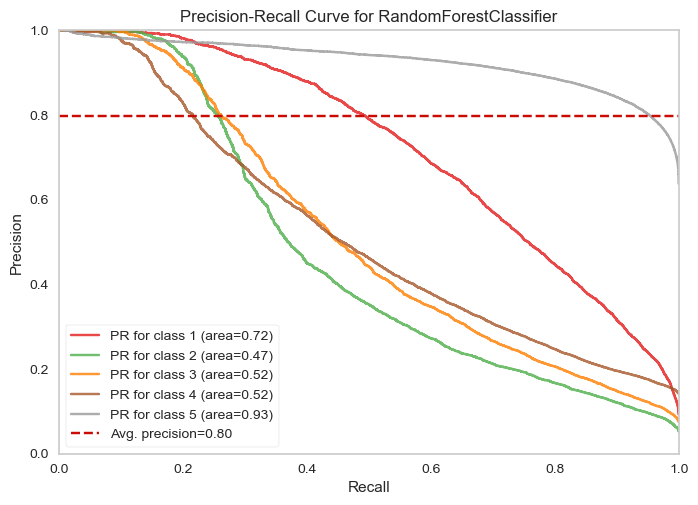

In [47]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [48]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [49]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[ 6934   400   298   274  1236]
 [ 1258  2055   488   379  1008]
 [  913   390  3219  1106  1783]
 [  759   236   680  6350  5974]
 [ 2525   539   872  3956 55036]]
Test_Set
              precision    recall  f1-score   support

           1       0.56      0.76      0.64      9142
           2       0.57      0.40      0.47      5188
           3       0.58      0.43      0.50      7411
           4       0.53      0.45      0.49     13999
           5       0.85      0.87      0.86     62928

    accuracy                           0.75     98668
   macro avg       0.62      0.58      0.59     98668
weighted avg       0.74      0.75      0.74     98668

Train_Set
              precision    recall  f1-score   support

           1       0.71      0.88      0.79     36570
           2       0.81      0.80      0.80     20752
           3       0.83      0.75      0.79     29642
           4       0.74      0.67      0.70     55996
           5       0.91      0.91    

**Step 2: TF-IDF + Machine Learning Classifier:**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(
    preprocessor=cleaning,
    min_df=3,      
    max_features=5000  
)

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)


In [56]:
tf_idf_vectorizer = TfidfVectorizer(
    preprocessor=cleaning,
    min_df=3,
    max_features=5000,
    ngram_range=(1, 1)  # only unigrams
)

In [58]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Custom cleaning function should be defined above this
# Example placeholder:
# def cleaning(text):
#     text = text.lower()
#     # Add more cleaning steps (remove punctuation, stopwords, etc.)
#     return text

# 1. Define TF-IDF Vectorizer with memory optimization
tf_idf_vectorizer = TfidfVectorizer(
    preprocessor=cleaning,   # custom cleaning function
    min_df=3,                # ignore very rare words
    max_features=5000,       # limit vocabulary to 5000 most frequent tokens
    ngram_range=(1, 1),      # use only unigrams
    dtype=np.float32         # reduce memory usage
)

# 2. Create a pipeline with Naive Bayes
pipeline = Pipeline([
    ('tfidf', tf_idf_vectorizer),
    ('nb', MultinomialNB())
])

# 3. Train the model
pipeline.fit(X_train, y_train)

# 4. Predict on test data
y_pred = pipeline.predict(X_test)

# 5. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6706024242915636
              precision    recall  f1-score   support

           1       0.70      0.33      0.45      9142
           2       0.65      0.01      0.02      5188
           3       0.52      0.02      0.04      7411
           4       0.47      0.03      0.05     13999
           5       0.67      0.99      0.80     62928

    accuracy                           0.67     98668
   macro avg       0.60      0.28      0.27     98668
weighted avg       0.63      0.67      0.56     98668



**Naive Bayes**

In [59]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [60]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 2990    17    29    20  6086]
 [  565    45    89    74  4415]
 [  338     6   160   247  6660]
 [  146     1    20   408 13424]
 [  228     0    12   124 62564]]
Test_Set
              precision    recall  f1-score   support

           1       0.70      0.33      0.45      9142
           2       0.65      0.01      0.02      5188
           3       0.52      0.02      0.04      7411
           4       0.47      0.03      0.05     13999
           5       0.67      0.99      0.80     62928

    accuracy                           0.67     98668
   macro avg       0.60      0.28      0.27     98668
weighted avg       0.63      0.67      0.56     98668

Train_Set
              precision    recall  f1-score   support

           1       0.72      0.33      0.45     36570
           2       0.68      0.01      0.02     20752
           3       0.53      0.02      0.04     29642
           4       0.51      0.03      0.06     55996
           5       0.67      0.99      0.80   

In [61]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.670172
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

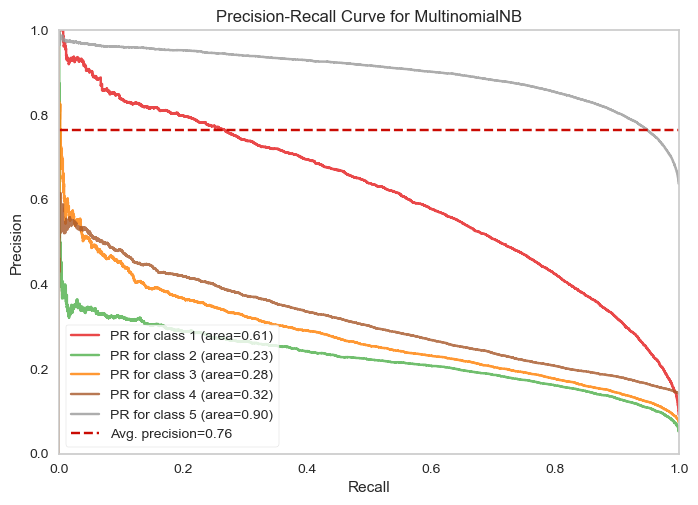

In [62]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

**Logistic Regression**

In [64]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [65]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 6065   472   372   197  2036]
 [ 1504   866   791   329  1698]
 [  780   382  2021  1140  3088]
 [  381   135   781  3230  9472]
 [  675   120   413  1583 60137]]
Test_Set
              precision    recall  f1-score   support

           1       0.64      0.66      0.65      9142
           2       0.44      0.17      0.24      5188
           3       0.46      0.27      0.34      7411
           4       0.50      0.23      0.32     13999
           5       0.79      0.96      0.86     62928

    accuracy                           0.73     98668
   macro avg       0.57      0.46      0.48     98668
weighted avg       0.69      0.73      0.69     98668

Train_Set
              precision    recall  f1-score   support

           1       0.67      0.68      0.67     36570
           2       0.51      0.20      0.29     20752
           3       0.49      0.29      0.36     29642
           4       0.53      0.24      0.33     55996
           5       0.79      0.96      0.86  

In [66]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.731184
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

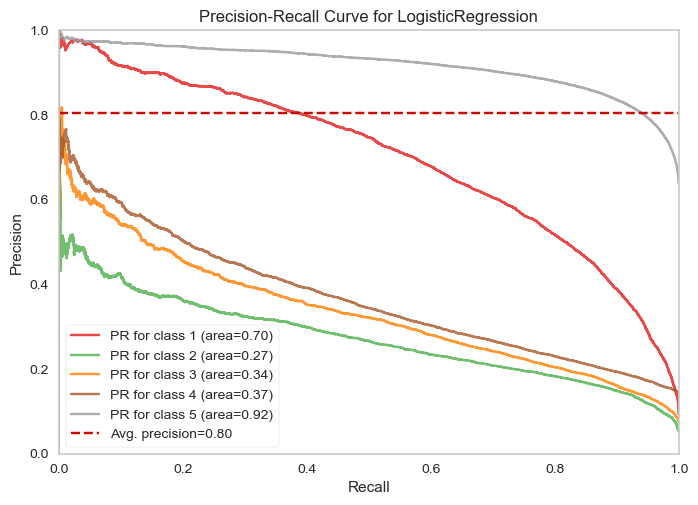

In [67]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [69]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [70]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[ 6204  1698   724   242   274]
 [ 1216  2384  1048   338   202]
 [  761  1406  3348  1384   512]
 [  566   936  2274  6582  3641]
 [ 2278  2038  3148 11255 44209]]
Test_Set
              precision    recall  f1-score   support

           1       0.56      0.68      0.62      9142
           2       0.28      0.46      0.35      5188
           3       0.32      0.45      0.37      7411
           4       0.33      0.47      0.39     13999
           5       0.91      0.70      0.79     62928

    accuracy                           0.64     98668
   macro avg       0.48      0.55      0.50     98668
weighted avg       0.72      0.64      0.66     98668

Train_Set
              precision    recall  f1-score   support

           1       0.59      0.71      0.65     36570
           2       0.33      0.54      0.41     20752
           3       0.35      0.50      0.41     29642
           4       0.36      0.51      0.42     55996
           5       0.91      0.71   

**SVM**

In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [72]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 6090   194   262   234  2362]
 [ 1675   551   591   394  1977]
 [  897   203  1467  1248  3596]
 [  442    79   431  2762 10285]
 [  648    55   236  1076 60913]]
Test_Set
              precision    recall  f1-score   support

           1       0.62      0.67      0.64      9142
           2       0.51      0.11      0.18      5188
           3       0.49      0.20      0.28      7411
           4       0.48      0.20      0.28     13999
           5       0.77      0.97      0.86     62928

    accuracy                           0.73     98668
   macro avg       0.58      0.43      0.45     98668
weighted avg       0.68      0.73      0.68     98668

Train_Set
              precision    recall  f1-score   support

           1       0.65      0.69      0.67     36570
           2       0.60      0.13      0.21     20752
           3       0.53      0.22      0.31     29642
           4       0.51      0.21      0.30     55996
           5       0.77      0.97      0.86  

In [73]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.727034
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

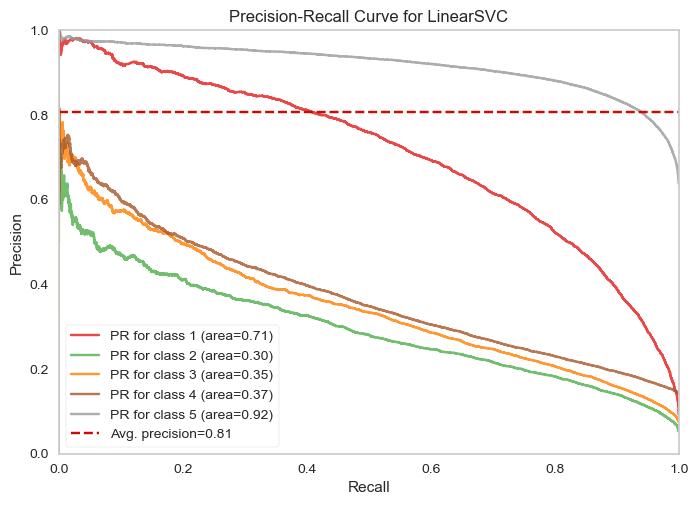

In [74]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

**RandomForest**

In [75]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [76]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 2630     0     0     6  6506]
 [  113   720     6    10  4339]
 [   47     0  1007    51  6306]
 [   14     0     6  1766 12213]
 [   13     0     1    15 62899]]
Test_Set
              precision    recall  f1-score   support

           1       0.93      0.29      0.44      9142
           2       1.00      0.14      0.24      5188
           3       0.99      0.14      0.24      7411
           4       0.96      0.13      0.22     13999
           5       0.68      1.00      0.81     62928

    accuracy                           0.70     98668
   macro avg       0.91      0.34      0.39     98668
weighted avg       0.78      0.70      0.62     98668

Train_Set
              precision    recall  f1-score   support

           1       0.99      0.40      0.57     36570
           2       1.00      0.24      0.38     20752
           3       1.00      0.24      0.39     29642
           4       1.00      0.22      0.36     55996
           5       0.71      1.00      0.83   

In [77]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.697643
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

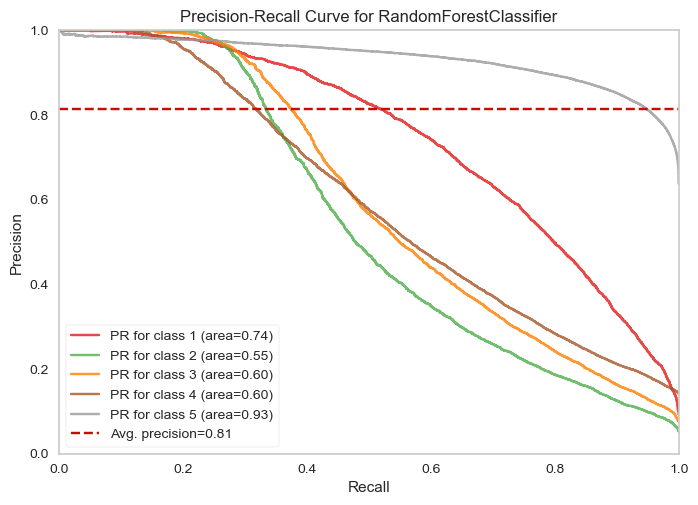

In [78]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [79]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [80]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[ 6035   936   565   273  1333]
 [ 1296  1923   790   327   852]
 [ 1014   821  3025  1070  1481]
 [  952   743  1950  4803  5551]
 [ 4037  2054  3424  6726 46687]]
Test_Set
              precision    recall  f1-score   support

           1       0.45      0.66      0.54      9142
           2       0.30      0.37      0.33      5188
           3       0.31      0.41      0.35      7411
           4       0.36      0.34      0.35     13999
           5       0.84      0.74      0.79     62928

    accuracy                           0.63     98668
   macro avg       0.45      0.50      0.47     98668
weighted avg       0.67      0.63      0.64     98668

Train_Set
              precision    recall  f1-score   support

           1       0.49      0.70      0.58     36570
           2       0.39      0.51      0.44     20752
           3       0.37      0.49      0.42     29642
           4       0.41      0.39      0.40     55996
           5       0.84      0.75    

**Ada Boost**

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [82]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 5446   588   417   152  2539]
 [ 1515   850   679   287  1857]
 [  884   525  1597   956  3449]
 [  460   190   778  2522 10049]
 [ 1098   237   490  1571 59532]]
Test_Set
              precision    recall  f1-score   support

           1       0.58      0.60      0.59      9142
           2       0.36      0.16      0.22      5188
           3       0.40      0.22      0.28      7411
           4       0.46      0.18      0.26     13999
           5       0.77      0.95      0.85     62928

    accuracy                           0.71     98668
   macro avg       0.51      0.42      0.44     98668
weighted avg       0.66      0.71      0.67     98668

Train_Set
              precision    recall  f1-score   support

           1       0.59      0.61      0.60     36570
           2       0.35      0.16      0.22     20752
           3       0.39      0.21      0.27     29642
           4       0.47      0.18      0.26     55996
           5       0.77      0.95      0.85  

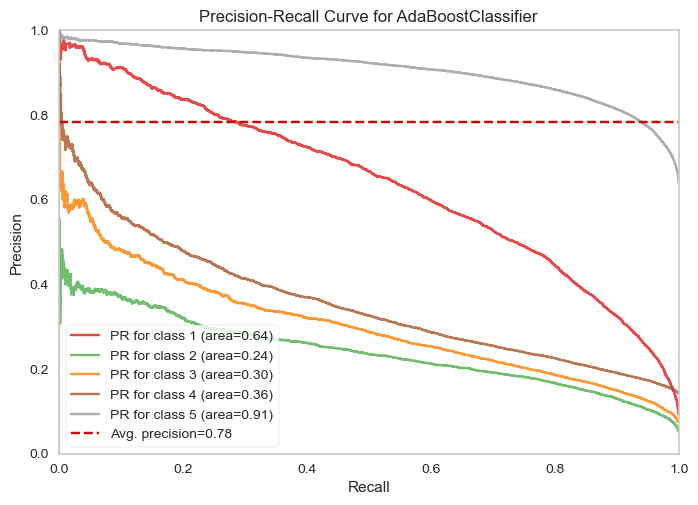

In [83]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

**Compare Scoring**

**✅ Bag of Words with Bigrams + Naive Bayes Classifier:**

In [89]:
# Count-based vectorizer using only bigrams
bow_bigram_vectorizer = CountVectorizer(
    preprocessor=cleaning,
    ngram_range=(2, 2),  # Only bigrams
    min_df=3             # Optional: ignore rare bigrams
)

X_train_bow_bigram = bow_bigram_vectorizer.fit_transform(X_train)
X_test_bow_bigram = bow_bigram_vectorizer.transform(X_test)


In [91]:
print("Shape:", X_train_bow_bigram.shape)
print("Number of bigram features:", len(bow_bigram_vectorizer.get_feature_names_out()))

Shape: (394672, 821824)
Number of bigram features: 821824


In [92]:
print("First 10 bigram features:")
print(bow_bigram_vectorizer.get_feature_names_out()[:10])


First 10 bigram features:
['aa coffee' 'aa not' 'aa quality' 'aa sumatra' 'aaah nothing' 'aacute le'
 'aacute muy' 'aacute pida' 'aaf hair' 'aafco association']


In [ ]:
nb_bow_bigram = MultinomialNB()
nb_bow_bigram.fit(X_train_bow_bigram, y_train)


In [93]:
sample_df = pd.DataFrame(
    X_train_bow_bigram[:5].toarray(),
    columns=bow_bigram_vectorizer.get_feature_names_out()
)
print(sample_df)


   aa coffee  aa not  aa quality  aa sumatra  aaah nothing  aacute le  \
0          0       0           0           0             0          0   
1          0       0           0           0             0          0   
2          0       0           0           0             0          0   
3          0       0           0           0             0          0   
4          0       0           0           0             0          0   

   aacute muy  aacute pida  aaf hair  aafco association  aafco certified  \
0           0            0         0                  0                0   
1           0            0         0                  0                0   
2           0            0         0                  0                0   
3           0            0         0                  0                0   
4           0            0         0                  0                0   

   aafco dog  aafco factor  aafco guideline  aafco large  aafco procedure  \
0          0             0 

In [97]:
from sklearn.metrics import accuracy_score, classification_report

def eval(model, X_train, X_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# ✅ Step 1: Define CountVectorizer for Bigrams
bow_bigram_vectorizer = CountVectorizer(
    preprocessor=cleaning,   # Your text cleaning function
    ngram_range=(2, 2),      # Only bigrams
    min_df=3                 # Ignore very rare bigrams
)

# ✅ Step 2: Transform the data
X_train_bow_bigram = bow_bigram_vectorizer.fit_transform(X_train)
X_test_bow_bigram = bow_bigram_vectorizer.transform(X_test)

# ✅ Step 3: Train Naive Bayes Classifier
nb_bow_bigram = MultinomialNB()
nb_bow_bigram.fit(X_train_bow_bigram, y_train)

# ✅ Step 4: Predict
y_pred_bigram = nb_bow_bigram.predict(X_test_bow_bigram)

# ✅ Step 5: Evaluate
print("📌 Bag of Words (Bigrams) + Naive Bayes")
print("Train Accuracy:", accuracy_score(y_train, nb_bow_bigram.predict(X_train_bow_bigram)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_bigram))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bigram))

📌 Bag of Words (Bigrams) + Naive Bayes
Train Accuracy: 0.91186605586411
Test Accuracy: 0.7920602424291564

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.71      0.73      9142
           2       0.71      0.38      0.50      5188
           3       0.64      0.46      0.54      7411
           4       0.58      0.50      0.54     13999
           5       0.85      0.94      0.89     62928

    accuracy                           0.79     98668
   macro avg       0.71      0.60      0.64     98668
weighted avg       0.78      0.79      0.78     98668




📊 Model Comparison Table:

             Accuracy  Precision    Recall  F1-Score
Model                                               
BOW Unigram  0.696274   0.685828  0.696274  0.690222
BOW Bigram   0.792060   0.778860  0.792060  0.779876
TF-IDF       0.670562   0.632612  0.670562  0.564371


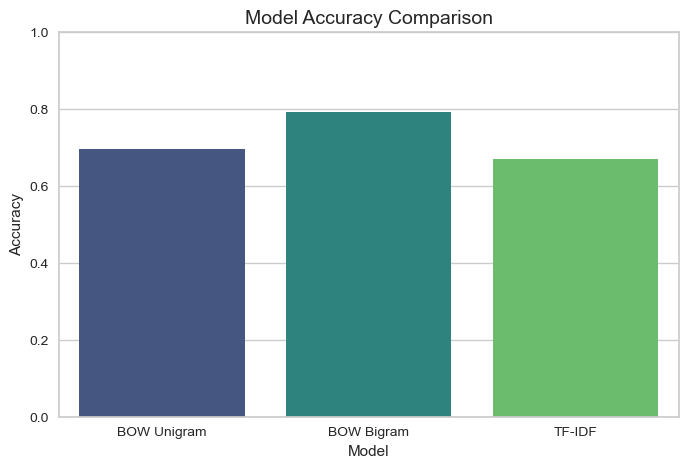

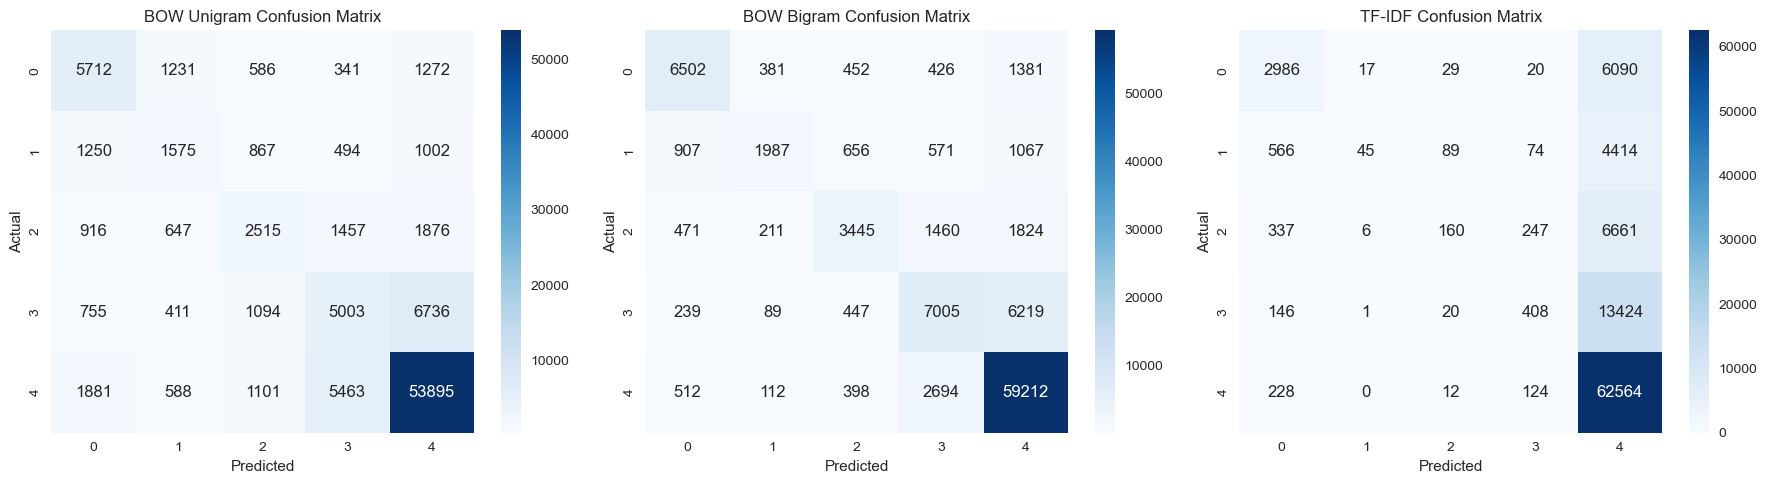

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# ===============================
# 1. Define vectorizers
# ===============================
bow_unigram = CountVectorizer(preprocessor=cleaning, ngram_range=(1,1), min_df=3)
bow_bigram = CountVectorizer(preprocessor=cleaning, ngram_range=(2,2), min_df=3)
tfidf = TfidfVectorizer(preprocessor=cleaning, ngram_range=(1,1), max_features=5000)

# ===============================
# 2. Transform data
# ===============================
X_train_bow_uni = bow_unigram.fit_transform(X_train)
X_test_bow_uni = bow_unigram.transform(X_test)

X_train_bow_bi = bow_bigram.fit_transform(X_train)
X_test_bow_bi = bow_bigram.transform(X_test)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===============================
# 3. Train models
# ===============================
models = {
    "BOW Unigram": (X_train_bow_uni, X_test_bow_uni),
    "BOW Bigram": (X_train_bow_bi, X_test_bow_bi),
    "TF-IDF": (X_train_tfidf, X_test_tfidf)
}

results = []
conf_matrices = {}

for name, (Xtr, Xte) in models.items():
    nb = MultinomialNB()
    nb.fit(Xtr, y_train)
    y_pred = nb.predict(Xte)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })
    
    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# ===============================
# 4. Create Results Table
# ===============================
results_df = pd.DataFrame(results).set_index("Model")
print("\n📊 Model Comparison Table:\n")
print(results_df)

# ===============================
# 5. Plot Accuracy Comparison
# ===============================
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# ===============================
# 6. Plot Confusion Matrices
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()
